# Movie Analysis

NOTE: This notebook should be viewed in nbviewer: https://nbviewer.jupyter.org/github/RPorter1312/Analysis-of-Movies-Database/blob/b99ef827419a3e6ba015936fe25a0c967d02f7b5/Movies_Analysis.ipynb

This notebook contains an analysis on various aspects of movies and documentaries over the years. First we will import the necessary libraries, and then perform some initial data cleansing so our data is easier to work with later on.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter, FuncFormatter
import seaborn as sns
import re
from collections import Counter
import ast
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
movies = pd.read_csv('.\\the-movies-dataset\\movies_metadata.csv', dtype={'popularity': object})

In [3]:
movies = movies[['id', 'title', 'overview', 'budget', 'genres', 'release_date', 'vote_average', 'vote_count',
       'imdb_id', 'original_language', 'adult', 'belongs_to_collection',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'homepage', 'revenue', 'runtime',
       'spoken_languages', 'status', 'original_title', 'video']]

In [4]:
movies = movies[movies['runtime'] <= 210].copy()

In [5]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies = movies[movies['release_date'].dt.year <= 2017]

In [6]:
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val

In [7]:
movies['genres'] = movies['genres'].fillna('[]').apply(ast.literal_eval)
movies['genres'] = movies['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

movies['production_companies'] = movies['production_companies'].fillna('[]').apply(ast.literal_eval)
movies['production_companies'] = movies['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

movies['production_countries'] = movies['production_countries'].fillna('[]').apply(ast.literal_eval)
movies['production_countries'] = movies['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

movies['spoken_languages'] = movies['spoken_languages'].fillna('[]').apply(ast.literal_eval)
movies['spoken_languages'] = movies['spoken_languages'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

movies['belongs_to_collection'] = movies['belongs_to_collection'].apply(literal_return)
movies['belongs_to_collection'] = movies['belongs_to_collection'].apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)

In [8]:
movies.dropna(inplace=True, thresh=16) #The database has 24 columns, we keep only movies with at least 2/3 of their data entered.

In [9]:
movies = movies[movies['title'].notnull()]

In [10]:
movies.reset_index(inplace=True, drop=True)

### Genres

Let's first look at the different genres associated with the movies in our dataset. We'll start by considering which genre of movie is the most common.

In [11]:
genres = []
for i in movies['genres']:
    for j in i:
        genres.append(j)

genres_dict = dict(Counter(genres))
genres_ordered = {k:v for k, v in sorted(genres_dict.items(), key=lambda item:item[1], reverse=True)}

In [12]:
genres_ordered.update((x, np.round((y/movies.shape[0])*100, 2)) for x, y in genres_ordered.items())

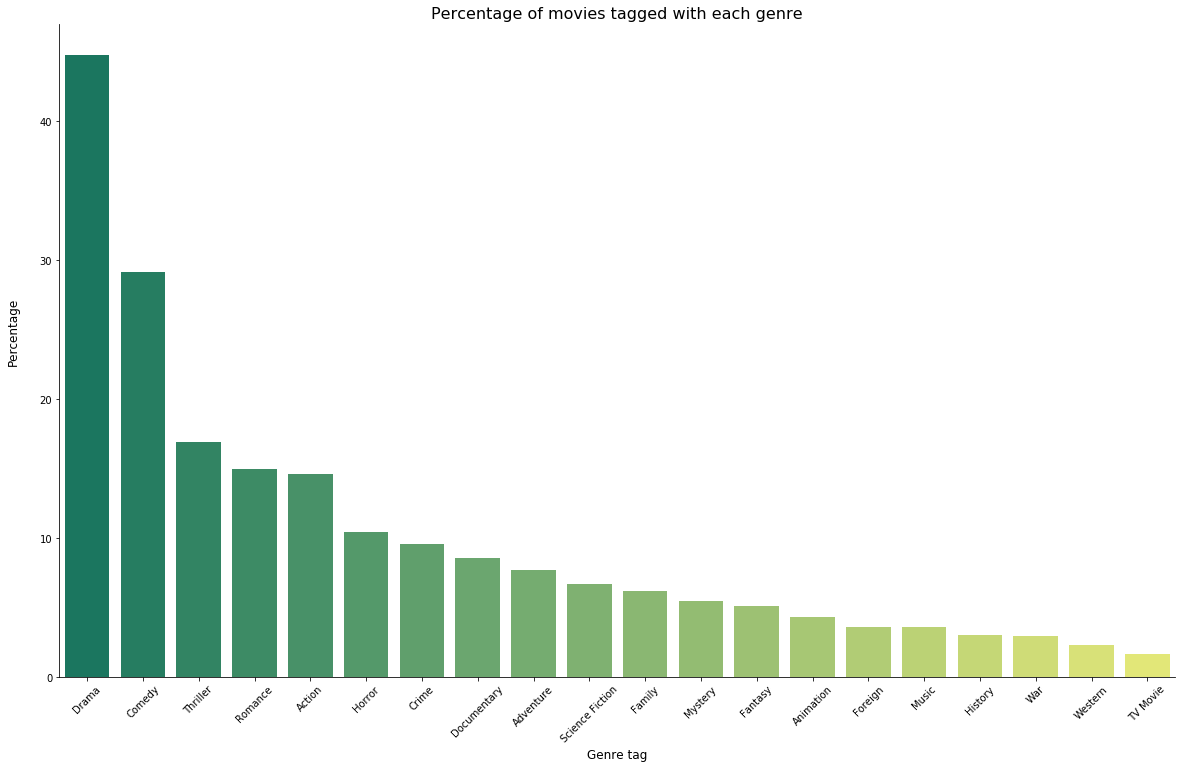

In [13]:
plt.figure(figsize=(20,12))
sns.barplot(x=list(genres_ordered.keys()), y=list(genres_ordered.values()), palette='summer')
sns.despine()
plt.title('Percentage of movies tagged with each genre', fontsize=16)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Genre tag', fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_label_coords(-0.035,0.53);

Drama movies are the most commonly produced, with nearly half of the movies in this dataset classified as dramas. Aside from the top two categories, the others are more evenly spread out. 

It isn't surprising to see tags such as drama and comedy being more prevalent in the data, as these are more general themes towards which movies could be directed, and as such are more likely to have overlap. For example, many war movies could also be considered drama movies, or a movie based in a fantasy world could have dramatic themes, however a movie is much less likely to be classified as both fantasy and war, as these are more niche genres.

This graph gives an overview of the entire dataset. Let's analyse whether the distribution has changed over the years.

In [14]:
movies_pre_1940 = movies[movies['release_date'].dt.year < 1940]
movies_1940_to_1959 = movies[(movies['release_date'].dt.year >= 1940) & (movies['release_date'].dt.year < 1960)]
movies_1960_to_1979 = movies[(movies['release_date'].dt.year >= 1960) & (movies['release_date'].dt.year < 1980)]
movies_1980_to_1999 = movies[(movies['release_date'].dt.year >= 1980) & (movies['release_date'].dt.year < 2000)]
movies_2000_to_2017 = movies[(movies['release_date'].dt.year >= 2000) & (movies['release_date'].dt.year < 2017)]

In [15]:
genres_pre_1940 = []
for i in movies_pre_1940['genres']:
    for j in i:
        genres_pre_1940.append(j)

genres_dict_pre_1940 = dict(Counter(genres_pre_1940))
genres_ordered_pre_1940 = {k:v for k, v in sorted(genres_dict_pre_1940.items(), key=lambda item:item[1], reverse=True)}
genres_ordered_pre_1940.update((x, np.round((y/movies_pre_1940.shape[0])*100, 2)) for x, y in genres_ordered_pre_1940.items())

genres_1940_to_1959 = []
for i in movies_1940_to_1959['genres']:
    for j in i:
        genres_1940_to_1959.append(j)

genres_dict_1940_to_1959 = dict(Counter(genres_1940_to_1959))
genres_ordered_1940_to_1959 = {k:v for k, v in sorted(genres_dict_1940_to_1959.items(), key=lambda item:item[1], reverse=True)}
genres_ordered_1940_to_1959.update((x, np.round((y/movies_1940_to_1959.shape[0])*100, 2)) for x, y in genres_ordered_1940_to_1959.items())

genres_1960_to_1979 = []
for i in movies_1960_to_1979['genres']:
    for j in i:
        genres_1960_to_1979.append(j)

genres_dict_1960_to_1979 = dict(Counter(genres_1960_to_1979))
genres_ordered_1960_to_1979 = {k:v for k, v in sorted(genres_dict_1960_to_1979.items(), key=lambda item:item[1], reverse=True)}
genres_ordered_1960_to_1979.update((x, np.round((y/movies_1960_to_1979.shape[0])*100, 2)) for x, y in genres_ordered_1960_to_1979.items())

genres_1980_to_1999 = []
for i in movies_1980_to_1999['genres']:
    for j in i:
        genres_1980_to_1999.append(j)

genres_dict_1980_to_1999 = dict(Counter(genres_1980_to_1999))
genres_ordered_1980_to_1999 = {k:v for k, v in sorted(genres_dict_1980_to_1999.items(), key=lambda item:item[1], reverse=True)}
genres_ordered_1980_to_1999.update((x, np.round((y/movies_1980_to_1999.shape[0])*100, 2)) for x, y in genres_ordered_1980_to_1999.items())

genres_2000_to_2017 = []
for i in movies_2000_to_2017['genres']:
    for j in i:
        genres_2000_to_2017.append(j)

genres_dict_2000_to_2017 = dict(Counter(genres_2000_to_2017))
genres_ordered_2000_to_2017 = {k:v for k, v in sorted(genres_dict_2000_to_2017.items(), key=lambda item:item[1], reverse=True)}
genres_ordered_2000_to_2017.update((x, np.round((y/movies_2000_to_2017.shape[0])*100, 2)) for x, y in genres_ordered_2000_to_2017.items())

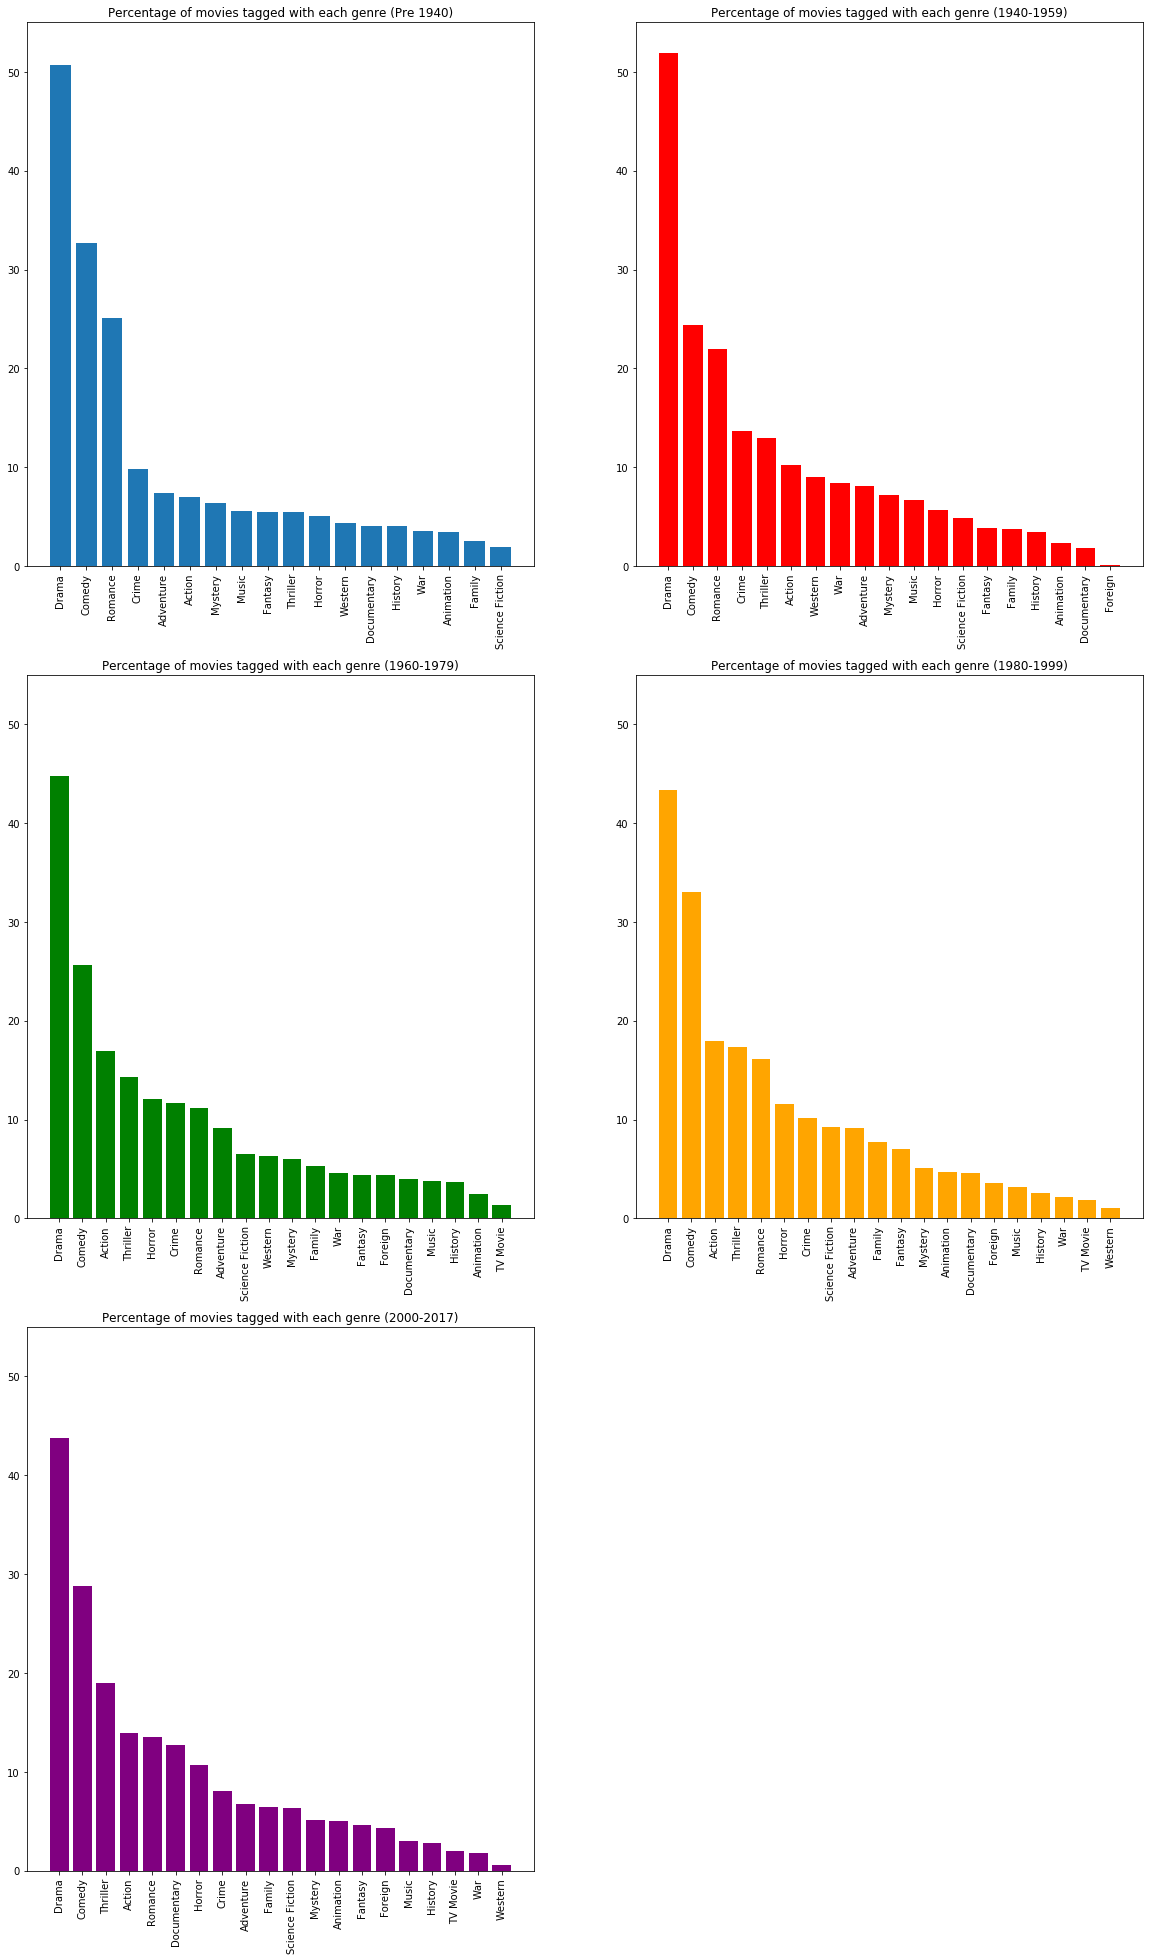

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(20,34))
plt.setp(ax, ylim=(0,55))
ax[0,0].bar(x=list(genres_ordered_pre_1940.keys()), height=list(genres_ordered_pre_1940.values()))
ax[0,0].set_title('Percentage of movies tagged with each genre (Pre 1940)')
ax[0,0].set_xticklabels(genres_ordered_pre_1940.keys(), rotation=90, fontsize=10)

ax[0,1].bar(x=list(genres_ordered_1940_to_1959.keys()), height=list(genres_ordered_1940_to_1959.values()), color='r')
ax[0,1].set_title('Percentage of movies tagged with each genre (1940-1959)')
ax[0,1].set_xticklabels(genres_ordered_1940_to_1959.keys(), rotation=90, fontsize=10)

ax[1,0].bar(x=list(genres_ordered_1960_to_1979.keys()), height=list(genres_ordered_1960_to_1979.values()), color='g')
ax[1,0].set_title('Percentage of movies tagged with each genre (1960-1979)')
ax[1,0].set_xticklabels(genres_ordered_1960_to_1979.keys(), rotation=90, fontsize=10)

ax[1,1].bar(x=list(genres_ordered_1980_to_1999.keys()), height=list(genres_ordered_1980_to_1999.values()), color='orange')
ax[1,1].set_title('Percentage of movies tagged with each genre (1980-1999)')
ax[1,1].set_xticklabels(genres_ordered_1980_to_1999.keys(), rotation=90, fontsize=10)

ax[2,0].bar(x=list(genres_ordered_2000_to_2017.keys()), height=list(genres_ordered_2000_to_2017.values()), color='purple')
ax[2,0].set_title('Percentage of movies tagged with each genre (2000-2017)')
ax[2,0].set_xticklabels(genres_ordered_2000_to_2017.keys(), rotation=90, fontsize=10)

ax[2,1].set_visible(False);

Drama and comedy are the top two most common genres in each time bracket, however there is some variation in the other genres over time. Some notable changes are the increase in action movies over time, which could be attributed to improvements in CGI technology, and similarly for science fiction. In constrast, western movies were at their peak in popularity during the 1940's to 1960's, compared to more recent years where they are the least popular movies to produce.

Let's investigate whether certain genres appear as a combination more or less than others. We can demonstrate this using a network graph.

In [17]:
import networkx as nx

from sklearn.preprocessing import MultiLabelBinarizer

In [18]:
mlb = MultiLabelBinarizer()

In [19]:
genres_bin = mlb.fit_transform(movies['genres'])

In [20]:
data = pd.DataFrame(genres_bin, columns=mlb.classes_)

In [21]:
corr_matrix = data.corr()
genres = corr_matrix.index.values
corr_matrix = np.asmatrix(corr_matrix)

In [22]:
G = nx.from_numpy_matrix(corr_matrix)
G = nx.relabel_nodes(G, lambda x: genres[x])

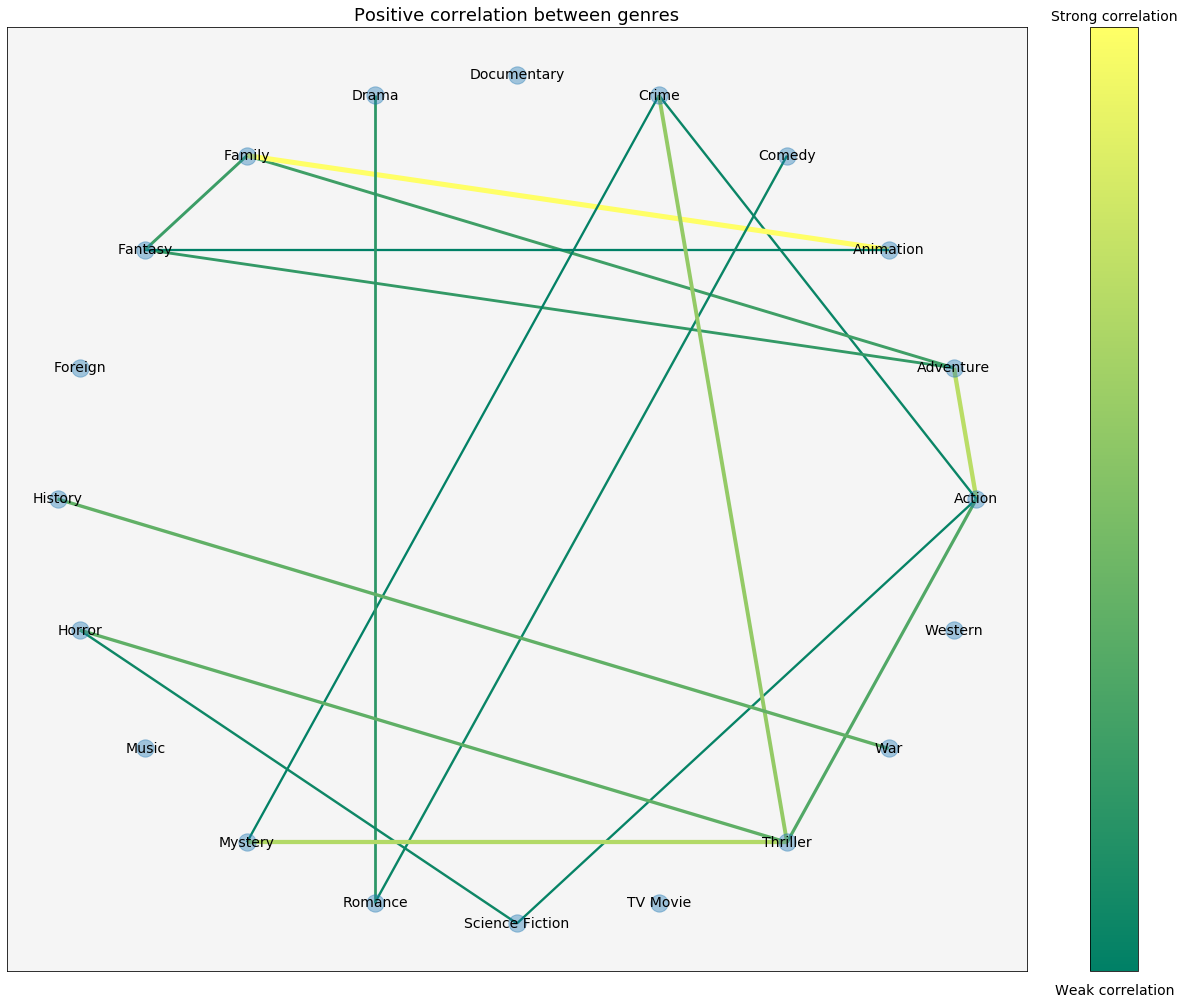

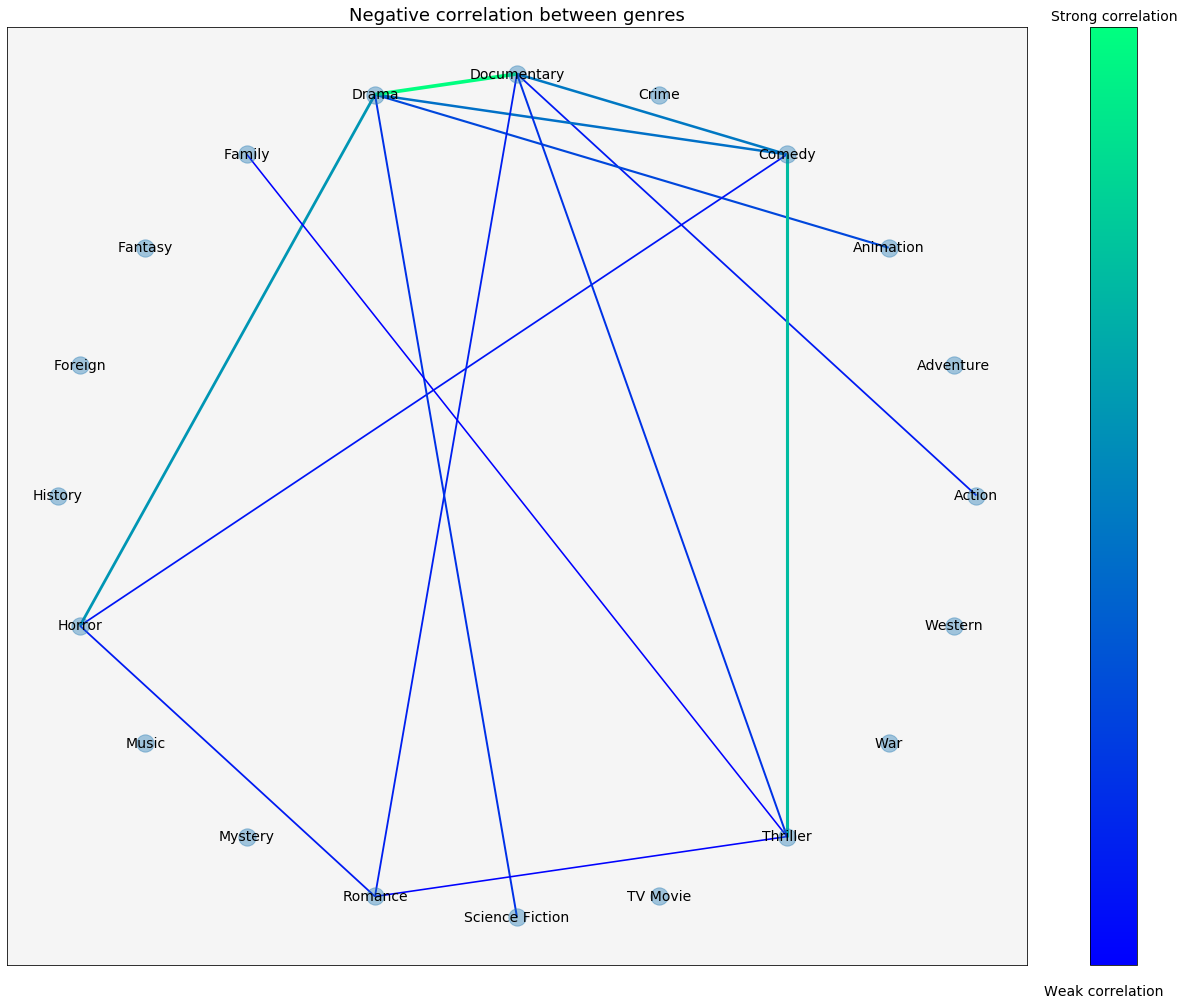

In [23]:
def create_corr_network(G, corr_direction, min_corr):
    H = G.copy()
    
    for genre1, genre2, weight in list(H.edges(data=True)):
        if corr_direction == 'positive':
            if weight['weight'] < 0 or weight['weight'] < min_corr:
                H.remove_edge(genre1, genre2)
        else:
            if weight['weight'] >= 0 or weight['weight'] > min_corr:
                H.remove_edge(genre1, genre2)
        
    
    edges, weights = zip(*nx.get_edge_attributes(H, 'weight').items())
    
    positions = nx.circular_layout(H)
    
    fig = plt.figure(figsize=(18,14))
    
    same_edges = [(a, b) for (a, b, c) in H.edges(data=True) if c['weight'] == 1]
    diff_edges = [(a, b) for (a, b, c) in H.edges(data=True) if c['weight'] != 1]
    
    weights = list([15*abs(x) for x in weights])
    weights = [weight for weight in weights if weight != 15]
    
    if corr_direction == 'positive':
        edge_colour = plt.cm.summer
    else:
        edge_colour = plt.cm.winter
    
    nx.draw_networkx_nodes(H, positions, node_size=300, alpha=0.4)
    
    nx.draw_networkx_labels(H, positions, font_size=14)
    
    nx.draw_networkx_edges(H, positions, edgelist=diff_edges, style='solid', width=weights, edge_color=weights,
                           edge_cmap=edge_colour, edge_vmin=min(weights), edge_vmax=max(weights))
    
    
    plt.axis()
    
    plt.gca().set_facecolor('whitesmoke')
    
    plt.title(f'{corr_direction.capitalize()} correlation between genres', fontsize=18)
    
    colors = range(int(np.round(max(weights))))
    cmap = edge_colour
    vmin = min(colors)
    vmax = max(colors)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
    cbar = plt.colorbar(sm)
    cbar.set_ticks([])
    cbar.ax.set_title('Strong correlation', fontsize=14)
    cbar.ax.text(-3, -0.1, 'Weak correlation', fontsize=14)
    
    fig.tight_layout()

create_corr_network(G, 'positive', 0.15)
create_corr_network(G, 'negative', -0.1)

The two networks above show the positive and negative correlation between genres tagging the same movie. There is a minimum correlation needed for an edge to be drawn; genres with no edges between them still have a slight correlation, however for clarity we only show the strongest links.

In the positive case, we see that the strongest correlation is between the family and animation genres. This makes sense, as the majority of animated movies are aimed towards children. The strong links between both crime and thriller, and mystery and thriller are also to be expected, though strangely the link between crime and mystery appears to be much weaker. 

For the negative case, the strongest link is between drama and documentary, which is again expected as documentaries are generally non-fiction and thus aim to be more factual. We also have strong links between thriller and comedy, and drama and horror. 

There are many genres with little to no strong correlations either way. Both the TV movie and Foreign genres have no links in either network, though this perhaps makes sense as these genres don't really say anything about the themes of the movie. Both the western and music genres have no strong correlations with any other genre either, and the war and history genres share only a positive correlation with each other.

It is worth noting that these networks only show how strong the correlations are relative to each other; there is actually a fairly low correlation between all the genres, both in the positive and negative sense. The link between family and animation, being the strongest positive correlation, only returns a Pearson's correlation coefficient of around 0.3.

In [24]:
movies['budget'] = pd.to_numeric(movies['budget'])

budgets = movies[movies['budget'] >= 10000].copy()
budgets.shape

revenues = movies[movies['revenue'] >= 10000].copy()
revenues.shape

(7152, 23)

We want to consider the budget and revenue associated with each genre. Both of these columns contain a lot of missing or inaccurate data, for example the budget column contains many small values (e.g. 0  or 1). We will try to filter these columns by only retaining values equal to or above $10000, which seems like it could be a reasonable movie budget or revenue.

In [25]:
genres = ['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Drama',
       'Romance', 'Action', 'Crime', 'Thriller', 'History',
       'Science Fiction', 'Mystery', 'Horror', 'War', 'Western',
       'Documentary', 'Music']

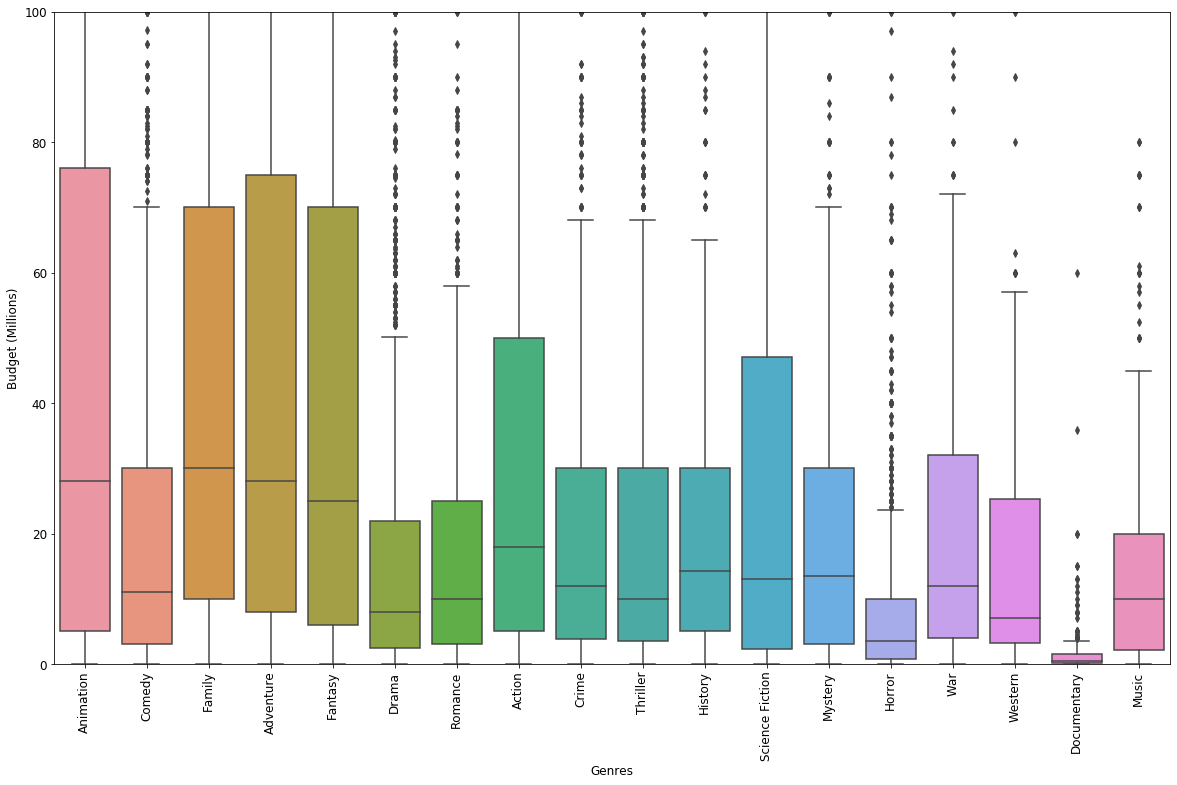

In [26]:
plt.figure(figsize=(20,12))
sns.boxplot(x='genres', y='budget', data=budgets.explode('genres')[budgets.explode('genres')['genres'].isin(genres)],
           order=genres)
plt.xticks(fontsize=9)
plt.gca().set_ylim(0, 1e8)
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, pos: int((int(x)/1000000))))
plt.gca().set_ylabel('Budget (Millions)', fontsize=12)
plt.gca().set_xlabel('Genres', fontsize=12)
plt.gca().tick_params(labelsize=12)
plt.xticks(rotation=90);

There is a large variety in the ranges of the different genres. Some of the more common genres, including drama and comedy, have a relatively low range of budget, and some of the lowest median values as well. Animation movies have one of the highest median budgets, and also a large range extending to much larger values than most of the other genres. This is to be expected, as animations rely heavily on computer generated graphics. The relatively large range and high median of the family genre could possibly be attributed to the high correlation between it and the animation genre, as discovered in our network above.

Horror movies appear to be the cheapest to produce, aside from documentaries which, in general, do not rely very heavily on special effects or casting.

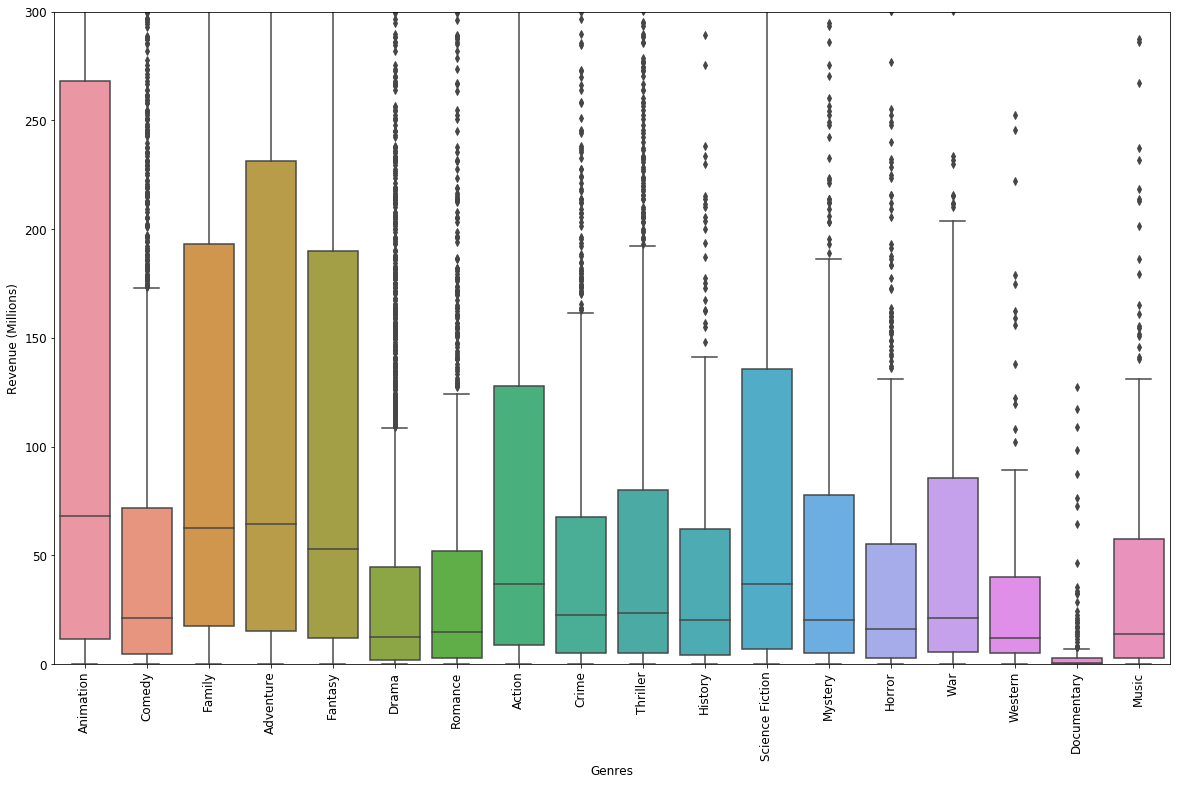

In [27]:
plt.figure(figsize=(20,12))
sns.boxplot(x='genres', y='revenue', data=revenues.explode('genres')[revenues.explode('genres')['genres'].isin(genres)],
           order=genres)
plt.xticks(fontsize=9)
plt.gca().set_ylim(0, 3e8)
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, pos: int((int(x)/1000000))))
plt.gca().set_ylabel('Revenue (Millions)', fontsize=12)
plt.gca().set_xlabel('Genres', fontsize=12)
plt.gca().tick_params(labelsize=12)
plt.xticks(rotation=90);

The shape of the revenue plot is very similar to the shape of the budget plot, possibly alluding to a positive correlation between the two quantities. One interesting feature of these plots is the fact that the median is towards the lower end of each box, and there are a significant amount of outliers towards the upper end of the budget/revenue scale. Together these imply that both the budget and revenue of the movies in this dataset is very skewed; the budget available to the very top studios, and subsequently the revenue they produce is far greater than the majority of the other movies.

Finally, let's consider which movies are making the largest profits or losses. We'll create a new return on investment(ROI) metric, where a value above 1 indicates profit made, and below 1 indicates a monetary loss.

In [28]:
b_and_r = budgets[budgets['revenue'] > 10000].copy()
b_and_r['ROI'] = b_and_r['revenue']/b_and_r['budget']
b_and_r[['title', 'ROI']].sort_values('ROI', ascending=False)

,title,ROI
14109,Paranormal Activity,12890.386667
2581,The Blair Witch Project,4133.333333
3538,Eraserhead,700.000000
4296,The Way of the Dragon,653.846154
2234,Pink Flamingos,500.000000
...,...,...
37947,Term Life,0.001288
25502,Foodfight!,0.001134
20855,Special Forces,0.001076
18883,5 Days of War,0.000874


Through a quick check we can see that the spread of values for the ROI column is heavily skewed. To make our plot more readable, we'll only include movies with a budget greater than $10 million.

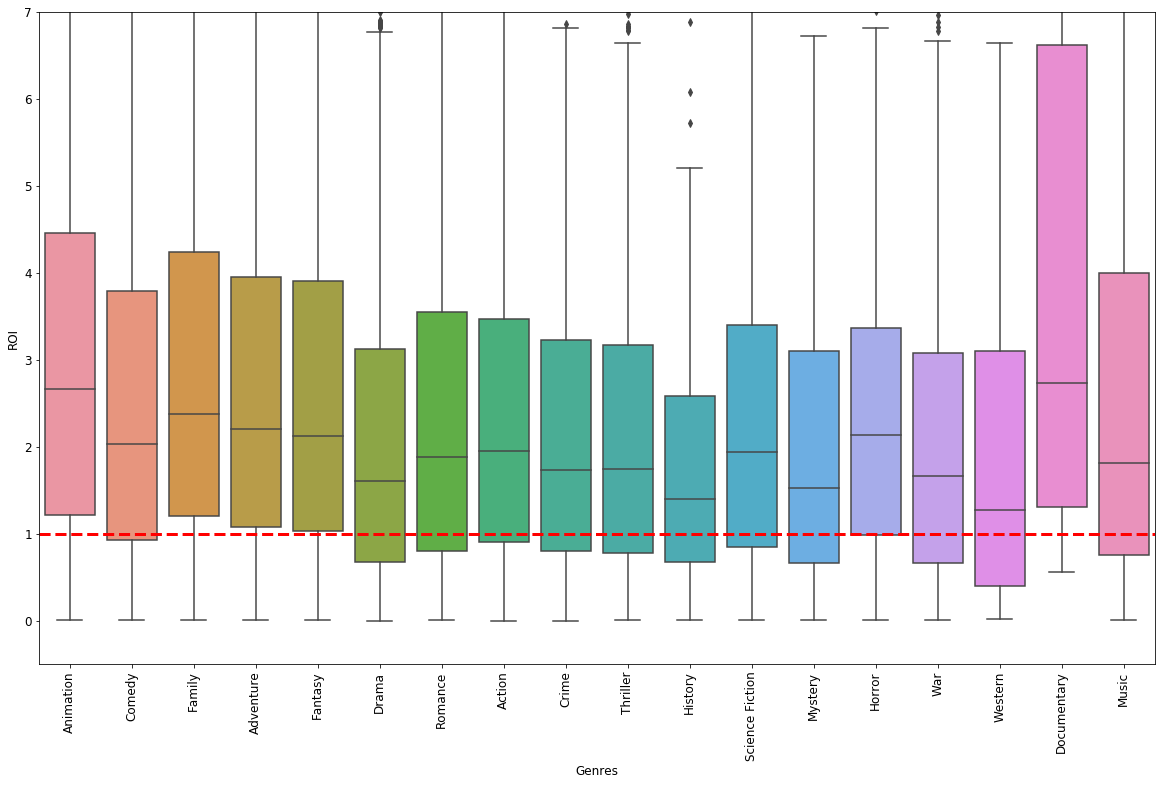

In [29]:
plt.figure(figsize=(20,12))
sns.boxplot(x='genres', y='ROI', data=b_and_r.explode('genres')[(b_and_r.explode('genres')['genres'].isin(genres))
                                                                   &(b_and_r.explode('genres')['budget']>1e7)],order=genres)
plt.xticks(fontsize=9)
plt.gca().set_ylim(-0.5, 7)
plt.gca().set_ylabel('ROI', fontsize=12)
plt.gca().set_xlabel('Genres', fontsize=12)
plt.gca().tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.axhline(y=1, linestyle='--', linewidth=3, color='r');

Every genre has its median ROI above 1, and the majority of their interquartile range, if not the whole of it, above the 'profit line'. This is based on a much smaller dataset than our original (around 5,000 compared to the 45,000 in the main dataset), so while this plot is not representative of the entire dataset, there are still enough data points to give us a good idea of each genres range of returns.

### Release Date

Next, we'll consider how the release date of a movie can affect its other properties.

In [30]:
day_order = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [31]:
def get_day(date):
    return day_order[date.weekday()]

def get_month(date):
    return month_order[date.month - 1]

In [32]:
movies['release_day'] = movies['release_date'].apply(get_day)
movies['release_month'] = movies['release_date'].apply(get_month)

In [33]:
year_count = movies.groupby(movies['release_date'].dt.year)['release_date'].count()

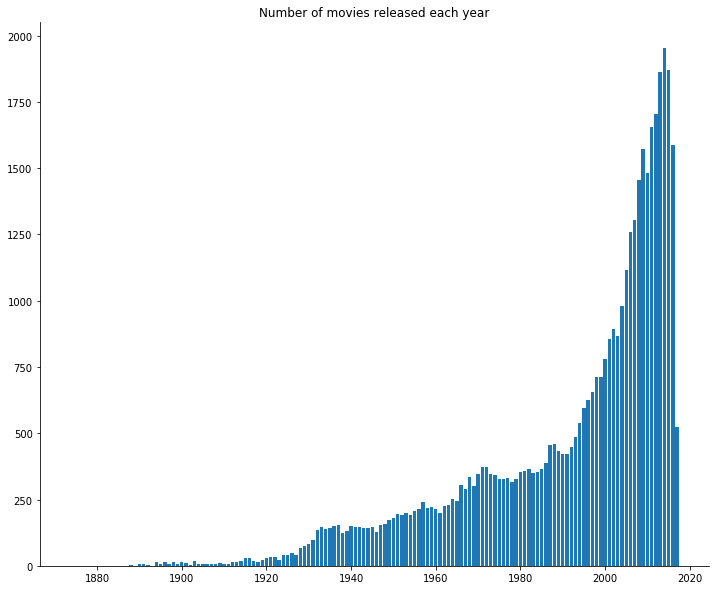

In [34]:
fig, ax = plt.subplots(figsize=(12,10))
sns.despine()
ax.bar(year_count.index, year_count.values)
ax.set_title('Number of movies released each year');

The dataset contains far more modern movies than older ones. This does not necessarily imply that there have been more movies produced in recent years, it is also possible that the data collected for this set favored more recently released movies. 

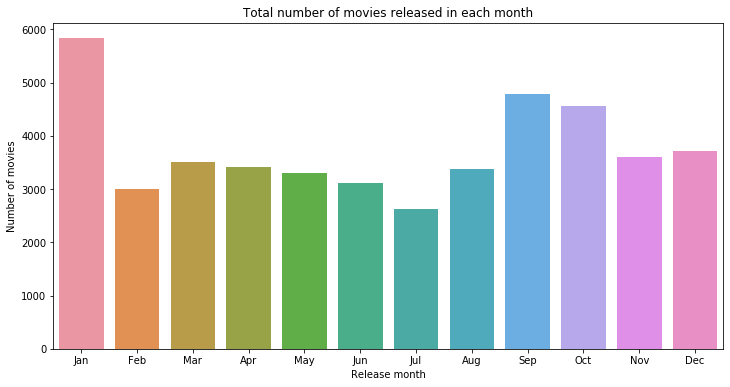

In [35]:
plt.figure(figsize=(12,6))
sns.countplot('release_month', data=movies, order=month_order)
plt.title('Total number of movies released in each month', fontsize=12)
plt.xlabel('Release month')
plt.ylabel('Number of movies');

January is the most popular release month, with almost 1000 more movies than the next most popular month. The spring/summer months appear to have a lower amount of releases.

Let's narrow the dates even further and consider movie releases by day:

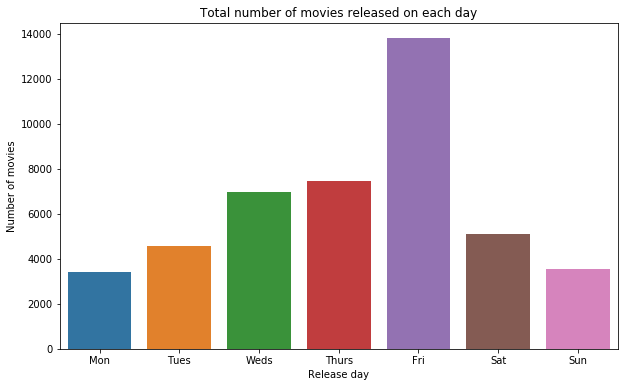

In [36]:
plt.figure(figsize=(10,6))
sns.countplot('release_day', data=movies, order=day_order)
plt.title('Total number of movies released on each day', fontsize=12)
plt.xlabel('Release day')
plt.ylabel('Number of movies');

As we would probably expect, friday is by far the most popular day for movie releases, most likely due to it being the beginning of the weekend for the majority of consumers. For the same reason, monday is the least popular release day.

In [37]:
budgets = movies[movies['budget'] >= 10000].copy()
revenues = movies[movies['revenue'] >= 10000].copy()
b_and_r = budgets[budgets['revenue'] > 10000].copy()
b_and_r['ROI'] = b_and_r['revenue']/b_and_r['budget']

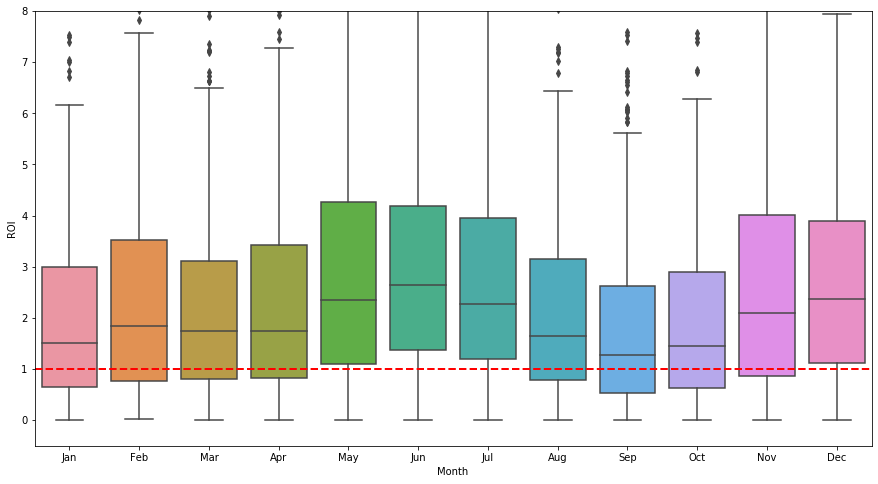

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot('release_month', 'ROI', data=b_and_r[b_and_r['budget'] > 1e7], order=month_order)
plt.gca().set_ylim(-0.5, 8)
plt.xlabel('Month')
plt.axhline(y=1, linestyle='--', linewidth=2, color='r');

From this plot it appears that movies released in the months from May to July give the highest return, with January, September and October being the lowest on average. This plot resembles the inverse of the number of movies released per month, which could be because with less movies released, consumers have a smaller number of options and therefore the revenue being brought in is spread over a smaller number of movies, thus increasing return.

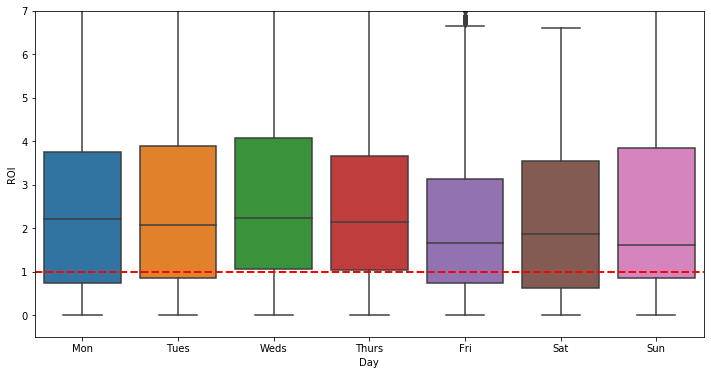

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot('release_day', 'ROI', data=b_and_r[b_and_r['budget'] > 1e7], order=day_order)
plt.gca().set_ylim(-0.5, 7)
plt.xlabel('Day')
plt.axhline(y=1, linestyle='--', linewidth=2, color='r');

### Votes

The dataset contains three metrics taken from TMDB users: vote count; vote average and popularity. We'll analyse these individually and see if there is any connection between them and other metrics in the dataset.

In [40]:
movies['popularity'] = movies['popularity'].astype(float)
movies['vote_count'] = movies['vote_count'].astype(float)
movies['vote_average'] = movies['vote_average'].astype(float)

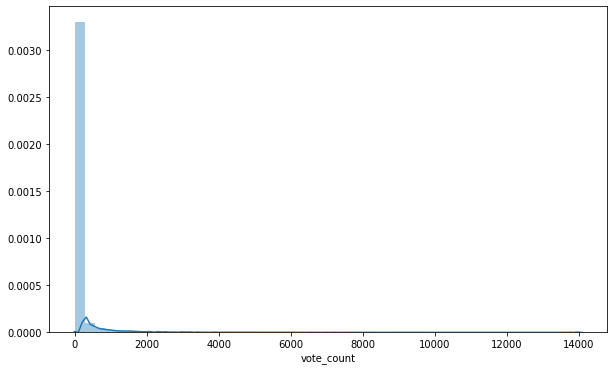

In [41]:
plt.figure(figsize=(10,6))
sns.distplot(movies['vote_count']);

The vast majority of movies have very few votes. This may make the average votes data insignificant, but we'll look at it anyway.

In [42]:
movies['vote_average'] = movies['vote_average'].replace(0, np.nan)

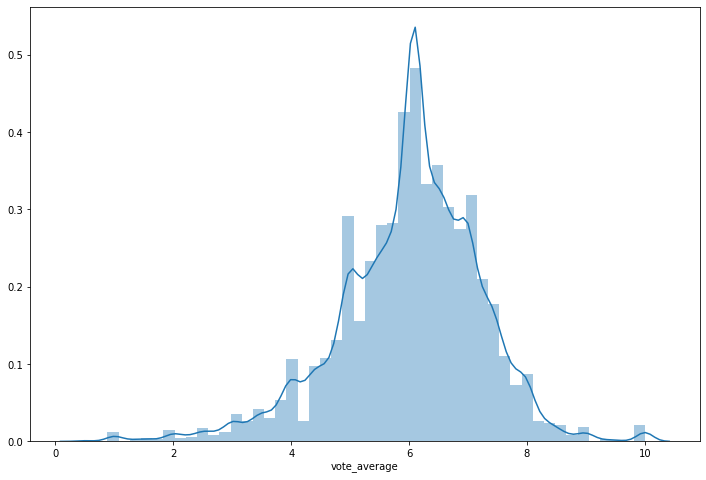

In [43]:
plt.figure(figsize=(12,8))
sns.distplot(movies['vote_average'].fillna(movies['vote_average'].median()));

The most common score for a movie appears to be around 6/10. Relatively few movies achieve a score of 8 or higher.

The 'popularity' metric is somewhat ambiguous. Let's compare it to the other voting metrics to see if these have an influence on it.

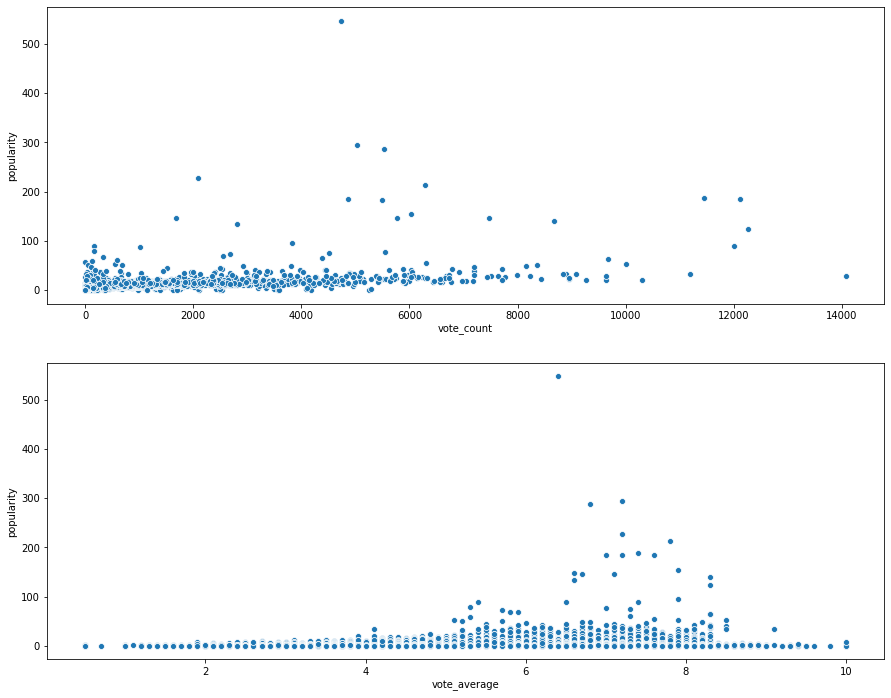

In [44]:
fig, ax = plt.subplots(2, figsize=(15,12))
sns.scatterplot('vote_count', 'popularity', data=movies, ax=ax[0])
sns.scatterplot('vote_average', 'popularity', data=movies, ax=ax[1]);

Of the two, it seems that the vote average has a slightly larger effect on the popularity of a movie, but neither has a strong correlation to it. Let's examine popularity alone.

In [45]:
movies['popularity'].describe()

count    44836.000000
mean         2.946849
std          6.036658
min          0.000000
25%          0.397425
50%          1.139969
75%          3.742847
max        547.488298
Name: popularity, dtype: float64

In [46]:
movies[movies['popularity'] > 100]

,id,title,overview,budget,genres,release_date,vote_average,vote_count,imdb_id,original_language,...,production_countries,homepage,revenue,runtime,spoken_languages,status,original_title,video,release_day,release_month
292,680,Pulp Fiction,"A burger-loving hit man, his philosophical par...",8000000,"[Thriller, Crime]",1994-09-10,8.3,8670.0,tt0110912,en,...,[United States of America],NaN,2.139288e+08,154.0,"[English, Español, Français]",Released,Pulp Fiction,False,Sat,Sep
12418,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,185000000,"[Drama, Action, Crime, Thriller]",2008-07-16,8.3,12269.0,tt0468569,en,...,"[United Kingdom, United States of America]",http://thedarkknight.warnerbros.com/dvdsite/,1.004558e+09,152.0,"[English, 普通话]",Released,The Dark Knight,False,Weds,Jul
14463,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",2009-12-10,7.2,12114.0,tt0499549,en,...,"[United States of America, United Kingdom]",http://www.avatarmovie.com/,2.787965e+09,162.0,"[English, Español]",Released,Avatar,False,Thurs,Dec
23467,210577,Gone Girl,With his wife's disappearance having become th...,61000000,"[Mystery, Thriller, Drama]",2014-10-01,7.9,6023.0,tt2267998,en,...,[United States of America],http://www.gonegirlmovie.com/,3.693304e+08,145.0,[English],Released,Gone Girl,False,Weds,Oct
24137,245891,John Wick,Ex-lunatic John Wick comes off his meds to tra...,20000000,"[Action, Thriller]",2014-10-22,7.0,5499.0,tt2911666,en,...,"[Canada, China, United States of America]",http://www.johnwickthemovie.com/,8.876166e+07,101.0,"[Magyar, English, Pусский]",Released,John Wick,False,Weds,Oct
24241,177572,Big Hero 6,The special bond that develops between plus-si...,165000000,"[Adventure, Family, Animation, Action, Comedy]",2014-10-24,7.8,6289.0,tt2245084,en,...,[United States of America],http://movies.disney.com/big-hero-6,6.521054e+08,102.0,[English],Released,Big Hero 6,False,Fri,Oct
24654,131631,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,125000000,"[Science Fiction, Adventure, Thriller]",2014-11-18,6.6,5767.0,tt1951265,en,...,[United States of America],http://www.thehungergames.movie/,7.521002e+08,123.0,[English],Released,The Hunger Games: Mockingjay - Part 1,False,Tues,Nov
26318,166426,Pirates of the Caribbean: Dead Men Tell No Tales,"Thrust into an all-new paycheck, a down-on-his...",230000000,"[Adventure, Action, Fantasy, Comedy]",2017-05-23,6.6,2814.0,tt1790809,en,...,[United States of America],http://pirates.disney.com/pirates-of-the-carib...,7.941920e+08,129.0,[English],Released,Pirates of the Caribbean: Dead Men Tell No Tales,False,Tues,May
26322,293660,Deadpool,Deadpool tells the origin story of former Spec...,58000000,"[Action, Adventure, Comedy]",2016-02-09,7.4,11444.0,tt1431045,en,...,[United States of America],http://www.foxmovies.com/movies/deadpool,7.831130e+08,108.0,[English],Released,Deadpool,False,Tues,Feb
26324,283995,Guardians of the Galaxy Vol. 2,The Guardians must fight to keep their newfoun...,200000000,"[Action, Adventure, Comedy, Science Fiction]",2017-04-19,7.6,4858.0,tt3896198,en,...,[United States of America],http://marvel.com/movies/movie/221/guardians_o...,8.634161e+08,137.0,[English],Released,Guardians of the Galaxy Vol. 2,False,Weds,Apr


The popularity stat is heavily skewed; the mean is just under 3, yet the maximum value is 547. We see above that of the 45000 movies in this dataset, only 16 of them have a popularity rating over 100. These movies seem to all have large vote counts, and higher vote scores than the average of 6 we found earlier. They also all have high revenue produced.

### Production Countries

The dataset contains information on the countries in which the movie was filmed, or otherwise produced. Which countries are the most popular filming locations?

In [47]:
countries = movies.explode('production_countries')
countries_no_us = countries[countries['production_countries'] != 'United States of America']

In [48]:
country_num = countries['production_countries'].value_counts()
country_num_no_us = countries_no_us['production_countries'].value_counts()

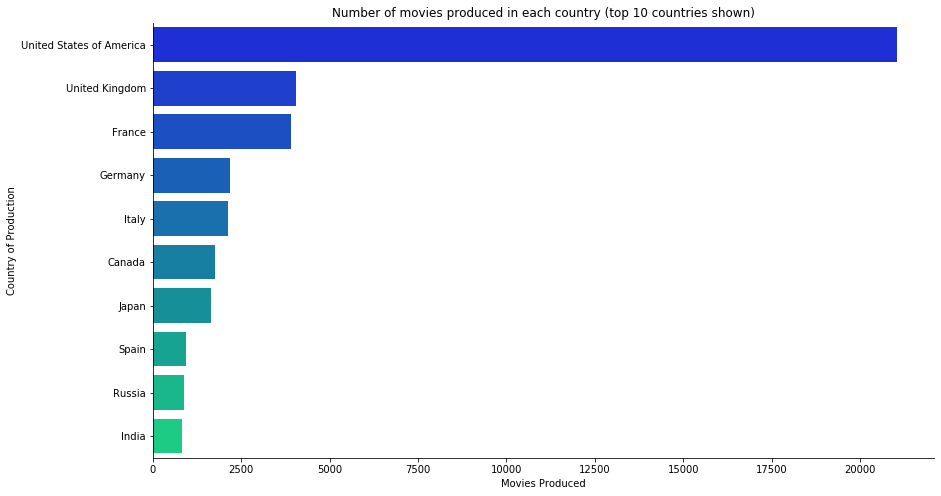

In [49]:
fig, ax = plt.subplots(figsize=(14,8))
sns.despine()
sns.barplot(y=country_num.index[0:10], x=country_num.values[0:10], palette='winter')
ax.set_xlabel('Movies Produced')
ax.set_ylabel('Country of Production')
ax.set_title('Number of movies produced in each country (top 10 countries shown)');

The USA is by far the most popular country to produce movies in. Let's plot this data more clearly on an interactive map. To do this, we'll need to exclude the USA, as it would skew the scale too far to draw a distinction between the other countries.

In [50]:
fig = go.Figure(go.Choropleth(locations=country_num_no_us.index, locationmode='country names', z=country_num_no_us.values,
                             colorscale=plotly.colors.sequential.YlGn))

fig.update_layout(geo = {'showocean': True, 'oceancolor': '#30a5ff'},
                  title='Number of movies produced in each country (excluding USA)', width=1000, height=700)

fig.show()

Aside from the USA, many European countries are popular locations for movie production, including the UK, France, Germany and Italy. Canada is also a fairly popular filming country, as are a few Asian countries such as Japan and India.

### Runtime

In [51]:
runtime = movies[movies['runtime'] > 0].copy()

In [52]:
yearly_runtime = runtime.groupby(runtime['release_date'].dt.year)['runtime'].mean()

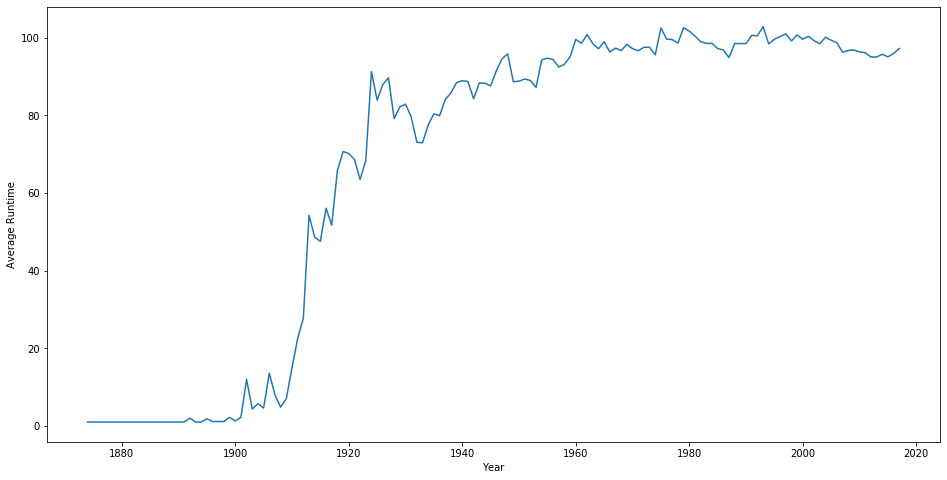

In [53]:
plt.figure(figsize=(16,8))
sns.lineplot(yearly_runtime.index, yearly_runtime.values)
plt.xlabel('Year')
plt.ylabel('Average Runtime');

The average runtime in the earliest years is very low, being just 1 minute for the first few years of the represented data. Longer movies begin to be produced by the early 1900's, and before 1920 we already have movies averaging over an hour in length. From 1920 onwards, there is very little change in average runtime.

It seems logical to suggest that longer movies would require an increased budget. Let's see if our data agrees with this:

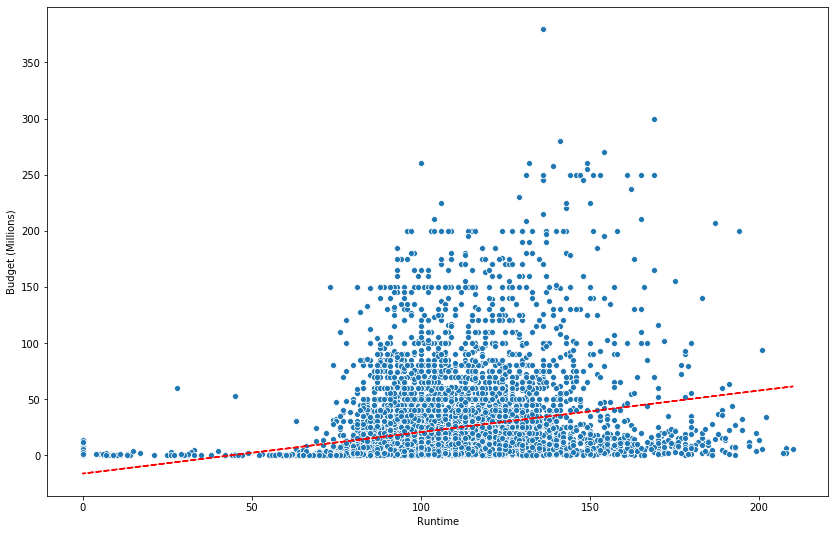

In [54]:
plt.figure(figsize=(14,9))
x = budgets['runtime']
y = budgets['budget']

sns.scatterplot(x=x, y=y)
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, pos: int((int(x)/1000000))))
plt.xlabel('Runtime')
plt.ylabel('Budget (Millions)')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--');

The correlation is much lower than I had anticipated. Many of the longest movies in this dataset actually have relatively low budgets. It seems that budget is affected more strongly by other properties (such as genre, which we explored earlier).

How does the runtime affect the ROI of a movie?

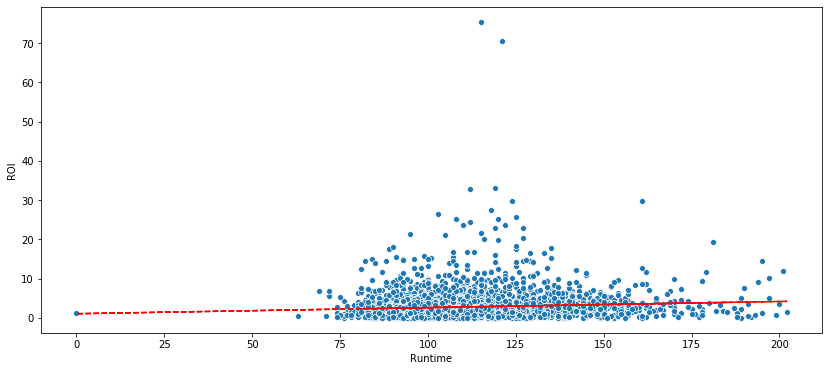

In [55]:
plt.figure(figsize=(14,6))
x = b_and_r[b_and_r['budget']>1e7]['runtime']
y = b_and_r[b_and_r['budget']>1e7]['ROI']

sns.scatterplot(x=x, y=y)
plt.xlabel('Runtime')
plt.ylabel('ROI')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--');

As with budget, the duration of a movie seems to have very little to no effect on its success. 

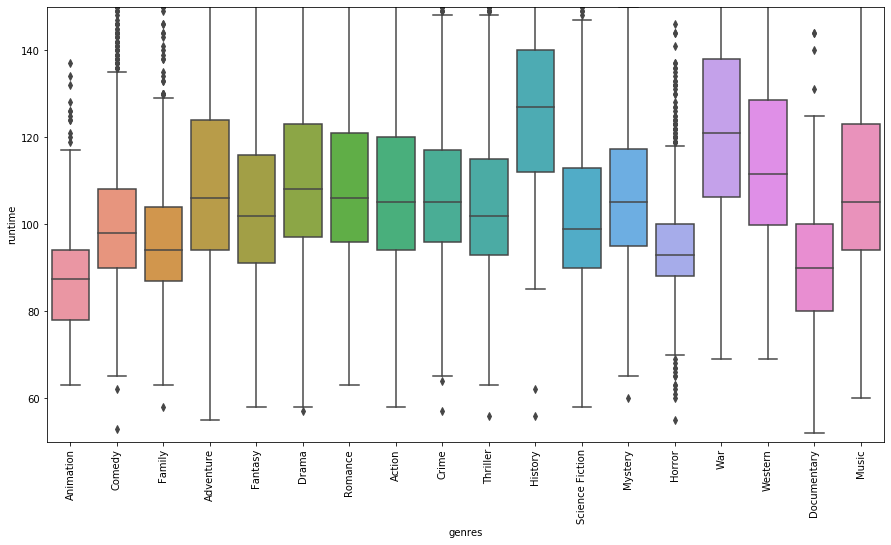

In [56]:
plt.figure(figsize=(15,8))
sns.boxplot(x='genres', y='runtime', data=budgets.explode('genres')[budgets.explode('genres')['genres'].isin(genres)],
            order=genres)
plt.gca().set_ylim(50, 150)
plt.xticks(rotation=90);

The runtime of movies across genres varies quite a bit. Animation movies have some of the lowest runtimes of all the genres, possibly due to the fact that these are usually aimed towards a younger audience who may prefer shorter movies, or because these movies tend to have some of the highest budgets, which would only increase further if more animation time was required. We see similarly short runtimes in both the horror and documentary genres.

History and War movies are the longest on average, being the only genres with the median over 2 hours. The remaining genres all show similar runtime averages, though some differ slightly in range.

### Budget and Revenue

We have already explored these quantities quite a lot in some of the other sections, but lets look more closely at them individually. One thing we must acknowledge is that these figures have not been adjusted for inflation, so the larger values tend to favour more recent movies.

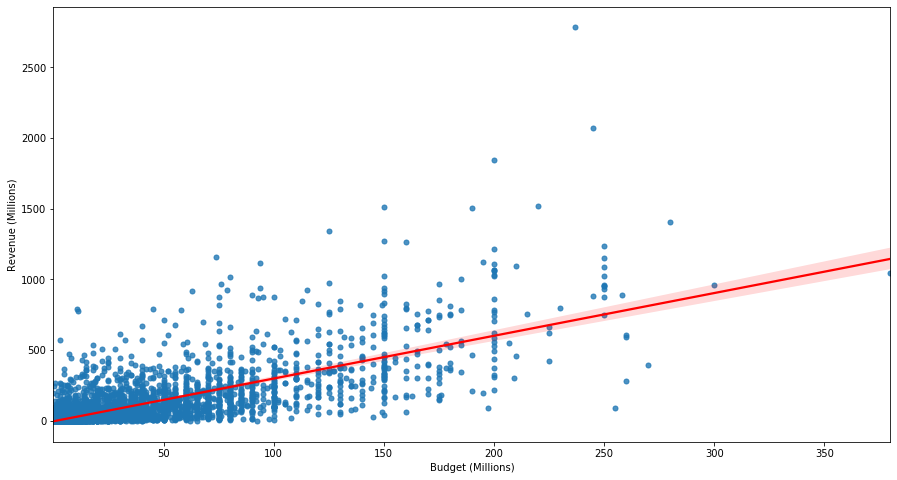

In [57]:
plt.figure(figsize = (15,8))
sns.regplot(x='budget', y='revenue', data=b_and_r, scatter_kws={'s': 25}, line_kws={'color': 'r'})
plt.gca().set_xlabel('Budget (Millions)')
plt.gca().set_ylabel('Revenue (Millions)')
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(lambda x, pos: int((int(x)/1000000))))
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, pos: int((int(x)/1000000))));

The correlation between the budget spent on a movie and the revenue produced from it looks to be quite strong. We noticed this earlier from our box plots of budget and revenue per genre looking similar.

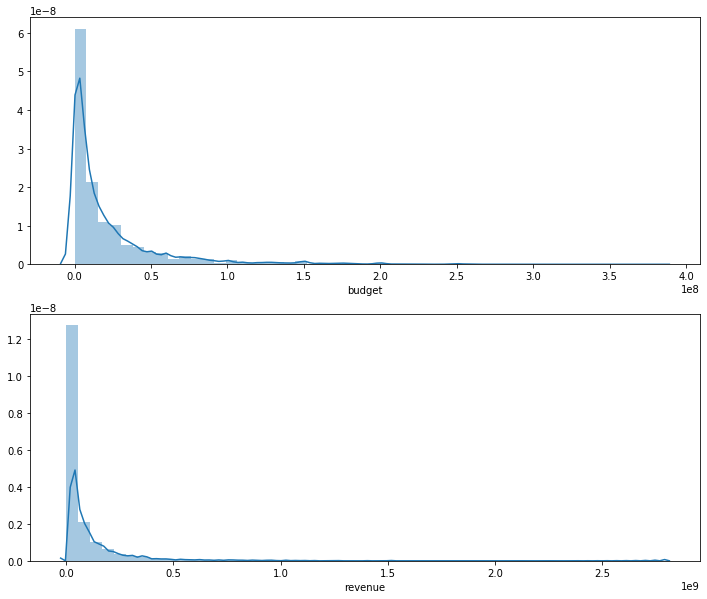

In [58]:
fig, ax = plt.subplots(2, figsize=(12,10))
sns.distplot(budgets['budget'], ax=ax[0]);
sns.distplot(revenues['revenue'], ax=ax[1]);

Most of the producers were working with very limited budgets, when compared to the largest budgets in this dataset. As expected, the distributions for these two quantities are similar in shape, reflecting the strong correlation between the two.

In [59]:
movies.sort_values('budget', ascending=False)[['title', 'budget', 'production_companies']].head(15)

,title,budget,production_companies
17010,Pirates of the Caribbean: On Stranger Tides,380000000,"[Walt Disney Pictures, Jerry Bruckheimer Films..."
11768,Pirates of the Caribbean: At World's End,300000000,"[Walt Disney Pictures, Jerry Bruckheimer Films..."
26317,Avengers: Age of Ultron,280000000,"[Marvel Studios, Prime Focus, Revolution Sun S..."
11011,Superman Returns,270000000,"[DC Comics, Legendary Pictures, Warner Bros., ..."
44234,Transformers: The Last Knight,260000000,"[Paramount Pictures, Di Bonaventura Pictures, ..."
18548,John Carter,260000000,[Walt Disney Pictures]
16024,Tangled,260000000,"[Walt Disney Pictures, Walt Disney Animation S..."
11721,Spider-Man 3,258000000,"[Columbia Pictures, Laura Ziskin Productions, ..."
20993,The Lone Ranger,255000000,"[Walt Disney Pictures, Jerry Bruckheimer Films..."
25169,The Hobbit: The Battle of the Five Armies,250000000,"[WingNut Films, New Line Cinema, Warner Bros. ..."


The top two movies in terms of budget are both from the Pirates of the Carribean franchise. We also see the three The Hobbit movies in this list, as well as two Harry Potter movies. Many of the companies in charge of production appear multiple times in this list, which we'll explore further in the next section.

In [60]:
movies.sort_values('revenue', ascending=False)[['title', 'budget', 'revenue', 'production_companies']].head(15)

,title,budget,revenue,production_companies
14463,Avatar,237000000,2.787965e+09,"[Ingenious Film Partners, Twentieth Century Fo..."
26314,Star Wars: The Force Awakens,245000000,2.068224e+09,"[Lucasfilm, Truenorth Productions, Bad Robot]"
1626,Titanic,200000000,1.845034e+09,"[Paramount Pictures, Twentieth Century Fox Fil..."
17694,The Avengers,220000000,1.519558e+09,"[Paramount Pictures, Marvel Studios]"
24864,Jurassic World,150000000,1.513529e+09,"[Universal Studios, Amblin Entertainment, Lege..."
28563,Furious 7,190000000,1.506249e+09,"[Universal Pictures, Original Film, Fuji Telev..."
26317,Avengers: Age of Ultron,280000000,1.405404e+09,"[Marvel Studios, Prime Focus, Revolution Sun S..."
17319,Harry Potter and the Deathly Hallows: Part 2,125000000,1.342000e+09,"[Warner Bros., Heyday Films]"
21918,Frozen,150000000,1.274219e+09,"[Walt Disney Pictures, Walt Disney Animation S..."
41689,Beauty and the Beast,160000000,1.262886e+09,"[Walt Disney Pictures, Mandeville Films]"


Interestingly, only one movie appears in both of these lists, that being Avengers: Age of Ultron. As mentioned earlier, the movies appearing in these 'top' lists are all recent releases, possibly biased due to the lack of inflation adjustment.

In [61]:
budgets.drop(1888, inplace=True) #Removing an inaccurate revenue value which alters the following graph.

In [62]:
yearly_average_budget = budgets.groupby(budgets['release_date'].dt.year)['budget'].mean()

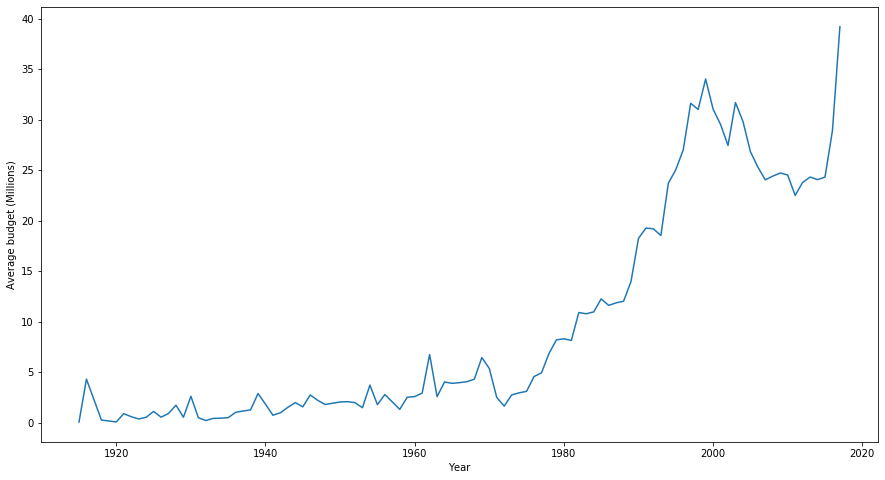

In [63]:
plt.figure(figsize=(15,8))
sns.lineplot(yearly_average_budget.index, yearly_average_budget.values)
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, pos: int((int(x)/1000000))))
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Average budget (Millions)');

The average budget remained low and stable until around the 1980's, at which point there is a sudden increase over the next two decades, until just before the year 2000. There is actually a decrease over the next 20 years until we reach the last year recorded in this dataset.

In [64]:
yearly_average_revenue = revenues.groupby(revenues['release_date'].dt.year)['revenue'].mean()

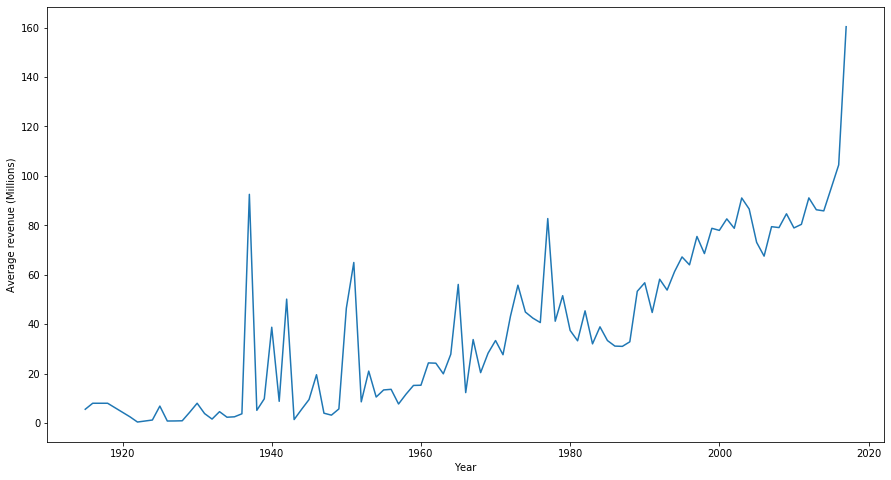

In [65]:
plt.figure(figsize=(15,8))
sns.lineplot(yearly_average_revenue.index, yearly_average_revenue.values)
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, pos: int((int(x)/1000000))))
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Average revenue (Millions)');

This graph is less stable than its budget equivalent above. There is a sudden peak pre-1940, seemingly attributed mostly to Snow White and the Seven Dwarfs, which remains the highest average until only very recently. We have already seen that this dataset favours more recent movies however, so this graph may be open to some bias in that only more popular older releases have been recorded.

### Production Companies

In [66]:
movies['number_of_companies'] = movies['production_companies'].apply(lambda x: len(x))
comp_num = movies['number_of_companies'].value_counts()
comp_num.sort_index(inplace=True)

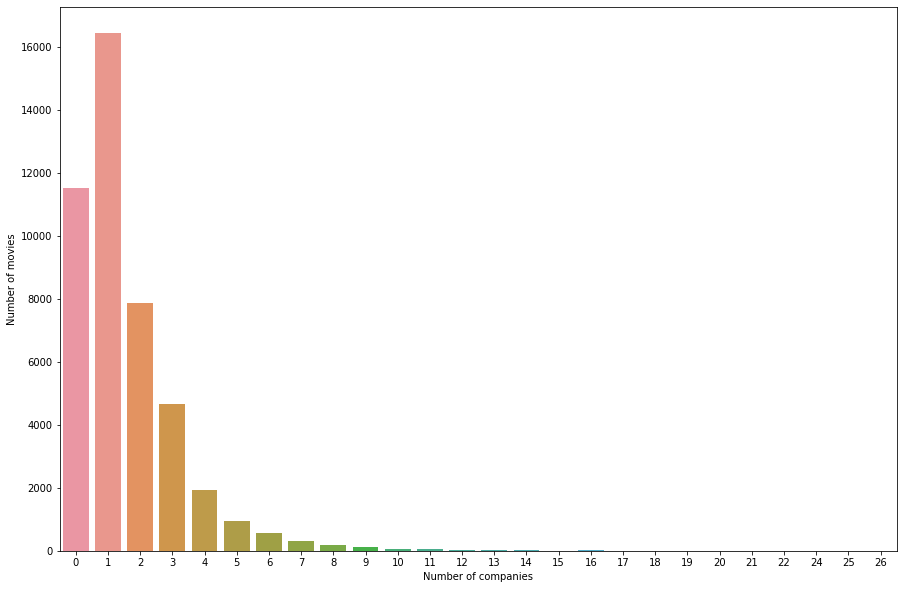

In [67]:
plt.figure(figsize = (15, 10))
sns.barplot(comp_num.index, comp_num.values)
plt.xlabel('Number of companies')
plt.ylabel('Number of movies');

Around one third of the movies in this dataset were produced by a single company. The next most common amount is zero, either movies produced without the backing of a company, or just incomplete data. A significant number of movies were produced by two, three, four or five studios at one time, numbers beyond this become increasingly rare.

In [68]:
b_and_r_comps = b_and_r.explode('production_companies').groupby('production_companies').sum()[['budget', 'revenue']].sort_values('budget', ascending=False)
movies_per_comp = b_and_r.explode('production_companies')['production_companies'].value_counts()

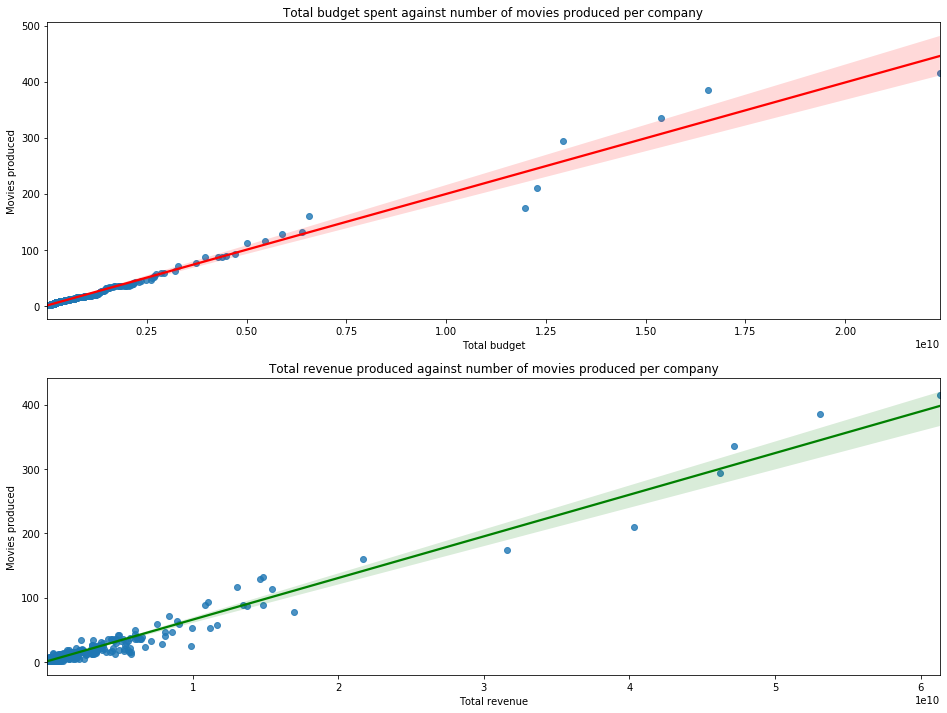

In [69]:
fig, ax = plt.subplots(2, figsize = (16,12))
sns.regplot(b_and_r_comps['budget'], movies_per_comp.values, line_kws={'color': 'r'}, ax=ax[0])
sns.regplot(b_and_r_comps['revenue'], movies_per_comp.values, line_kws={'color': 'g'}, ax=ax[1])
ax[0].set_xlabel('Total budget')
ax[1].set_xlabel('Total revenue')
ax[0].set_ylabel('Movies produced')
ax[1].set_ylabel('Movies produced')
ax[0].set_title('Total budget spent against number of movies produced per company')
ax[1].set_title('Total revenue produced against number of movies produced per company');

Unsurprisingly, there is a very strong correlation between the number of movies a company produces, and their budget spent/revenue gained.

In [70]:
movies_per_comp.name = 'number'
average_comps = b_and_r.explode('production_companies').groupby('production_companies').mean()[['budget', 'revenue']].sort_values('revenue', ascending=False)
average_comps = average_comps.join(movies_per_comp)
average_comps = average_comps[average_comps['number'] > 10]

In [71]:
comps_stacked = b_and_r.explode('production_companies')

comps_stacked.set_index(['production_companies', 'title'], inplace=True)
comps_stacked.sort_index(inplace=True)

In [72]:
top_3_rev = []
for i in list(average_comps.head(20).index):
    top_3_rev.append(list(zip(list(comps_stacked.loc[i].sort_values('revenue', ascending=False).head(3)['revenue'].index), list(comps_stacked.loc[i].sort_values('revenue', ascending=False).head(3)['revenue'].values))))

In [73]:
fig = go.Figure(go.Bar(x=list(average_comps.head(20).index), y=average_comps.head(20)['revenue'], customdata=top_3_rev,
                hovertemplate='<b>%{x} (%{y})</b><br>'
                             '%{customdata[0][0]}: %{customdata[0][1]:$,}<br>'
                             '%{customdata[1][0]}:  %{customdata[1][1]:$,}<br>'
                             '%{customdata[2][0]}: %{customdata[2][1]:$,}'
                             '<extra></extra>', marker_color='darkblue'))

fig.update_layout(title={'text': 'Most successful companies by average revenue produced', 'x': 0.5},
                  annotations = [{'text': 'Hover bars to see top 3 highest <br> revenue movies per company', 'showarrow': False,
                                 'x': 16, 'y': 750000000, 'font': {'color': 'green', 'family': 'Arial Black'}}],
                  yaxis_title = 'Average Revenue ($)', width=1000, height=800)

fig

### Collections

In [74]:
colls = movies[movies['belongs_to_collection'].notnull()].copy()
coll_num = colls['belongs_to_collection'].value_counts()

In [75]:
coll_num_temp = []
for i in colls['belongs_to_collection']:
    coll_num_temp.append(coll_num[i])
    
colls['movies_in_coll'] = coll_num_temp

In [76]:
coll_sum = colls[['belongs_to_collection', 'movies_in_coll']].drop_duplicates().groupby('movies_in_coll').count()

In [77]:
coll_sum.reset_index(inplace=True)
coll_sum.columns = ['movies_in_coll', 'number']

In [78]:
def coll_range_df(*args):
    if len(args) == 1:
        return pd.DataFrame({'movies_in_coll': f'{args[0]}+', 'number': coll_sum.loc[args[0]:].sum()[1]}, index=[args[0]*10])
    elif len(args) == 2:
        return pd.DataFrame({'movies_in_coll': f'{args[0]}-{args[1]}', 'number': coll_sum.loc[args[0]:args[1]].sum()[1]},
                            index=[args[0]*10])
    else:
        raise TypeError('Enter 1 or 2 numbers.')

In [79]:
coll_sum_1 = coll_range_df(8,10)
coll_sum_2 = coll_range_df(11)

coll_sum = pd.concat([coll_sum, coll_sum_1, coll_sum_2])

In [80]:
coll_sum.drop([i for i in range(7, 20)], inplace=True)

In [81]:
coll_sum

,movies_in_coll,number
0,1,389
1,2,678
2,3,346
3,4,115
4,5,59
5,6,38
6,7,16
80,8-10,20
110,11+,15


In [82]:
fig = go.Figure(go.Pie(values=coll_sum['number'], labels=coll_sum['movies_in_coll'], hoverinfo='skip', sort=False, hole=0.3))


fig.update_traces(marker={'line': {'width': 2}})

fig.update_layout(title={'text': 'Number of movies in collection', 'x': 0.5}, height=600)

fig

The most common number of movies in a collection is two. There are many movies that are in a collection by themselves, either due to the sequel(s) being unreleased or not being recorded in this dataset, or just inconsistency in data entry. It is rare for a collection to contain more than three movies.

In [83]:
coll_tot = colls.groupby('belongs_to_collection')['revenue'].sum().sort_values(ascending=False)
coll_tot = coll_tot.head(10)

In [84]:
coll_tot_frame = colls[colls['belongs_to_collection'].isin(coll_tot.head(10).index)]
coll_tot_frame = coll_tot_frame.set_index(['belongs_to_collection', 'title',]).sort_index()
coll_tot_frame.drop(['Banana', 'Mower Minions'], inplace=True, level='title')

In [85]:
def get_bar_data(ser,frame,bar_num):
    a = []
    b = []
    c = []
    for i in ser.index:
        if frame.loc[i].shape[0] > bar_num:
            a.append(i), b.append(frame.loc[i].sort_values('release_date').iloc[bar_num]['revenue']), c.append(frame.loc[i].sort_values('release_date').index[bar_num])
        
    return a, b, c

In [86]:
l_tot = [get_bar_data(coll_tot,coll_tot_frame,i) for i in range(26)]

In [87]:
coll_tot_data=[go.Bar(x=l_tot[i][0], y=l_tot[i][1], text=l_tot[i][2], hovertemplate='%{text}: %{y}<extra></extra>',
                      marker={'line': {'color': 'black', 'width': 1.5}}) for i in range(26)]

In [88]:
fig = go.Figure(data=coll_tot_data)

fig.update_layout(barmode='stack', width=1000, height=900, showlegend=False,
                  title={'text': 'Most successful series by total revenue produced', 'x': 0.5}, yaxis_title = 'Total Revenue ($)',
                  colorway=plotly.colors.qualitative.Plotly + plotly.colors.qualitative.G10 + plotly.colors.qualitative.T10)
fig

The Harry Potter series is the most commercially successful series in our dataset. The James Bond series contains far more movies than any of the other collections shown, and would probably top the chart if we adjusted the earlier releases for inflation. 

Lets see how ranking by average revenue instead of total changes the outcome:

In [89]:
coll_avg = colls[colls['movies_in_coll']>=3].groupby('belongs_to_collection')['revenue'].mean().sort_values(ascending=False)
coll_avg = coll_avg.head(10)

In [90]:
fig = go.Figure(go.Bar(y=coll_avg.index, x=coll_avg.values, orientation='h'))

fig.update_layout(width=1000, height=700, title={'text': 'Most successful franchises by average revenue produced', 'x': 0.5},
                 xaxis_title = 'Average Revenue ($)')
fig

Half of the series on this graph also appeared on the total revenue graph. The Hobbit collection and The Lords of the Rings collection, two series that are heavily linked, take the top two spots.

### Cast and Director

We also have a seperate dataset containing information on the cast and crew for each movie. After joining it to our main dataset, we can use this to see which actors and directors are the most successful, have made the most movies, and so on.

In [91]:
credits = pd.read_csv('.\\the-movies-dataset\\credits.csv')

credits['cast'] = credits['cast'].apply(ast.literal_eval)
credits['crew'] = credits['crew'].apply(ast.literal_eval)

movies['id'] = pd.to_numeric(movies['id'])

movies = movies.merge(credits, on='id', how='left')

def find_director(crew):
    if not isinstance(crew, list):
        return np.nan
    for i in crew:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

movies['cast'] = movies['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies['director'] = movies['crew'].apply(find_director)

In [92]:
movies.at[17215, 'cast'] = list(set(movies.at[17215, 'cast']))

In [93]:
top_actors = movies.explode('cast')[movies.explode('cast')['revenue'] > 10000].groupby('cast')['revenue'].sum().sort_values(ascending=False)

In [94]:
cast_stacked = movies.explode('cast')

In [95]:
cast_stacked.set_index(['cast', 'title'], inplace=True)

In [96]:
cast_stacked.sort_index(inplace=True)

In [97]:
top_3_act = []
for i in list(top_actors.head(20).index):
    top_3_act.append(list(zip(list(cast_stacked.loc[i].sort_values('revenue', ascending=False).head(3)['revenue'].index), list(cast_stacked.loc[i].sort_values('revenue', ascending=False).head(3)['revenue'].values))))

In [98]:
act_num = movies.explode('cast')['cast'].value_counts()

act_temp = []
for i in list(top_actors.head(20).index):
    act_temp.append(act_num.loc[i])

In [99]:
fig = go.Figure(go.Bar(x=list(top_actors.head(20).index), y=top_actors.head(20).values, customdata=top_3_act, text=act_temp,
                hovertemplate='<b>%{x} (%{y})</b><br>'
                             '%{customdata[0][0]}: %{customdata[0][1]:$,}<br>'
                             '%{customdata[1][0]}:  %{customdata[1][1]:$,}<br>'
                             '%{customdata[2][0]}: %{customdata[2][1]:$,}<br>'
                             'Number of appearances: %{text}'
                             '<extra></extra>', marker_color='green'))

fig.update_layout(title={'text': 'Most successful actors by total revenue produced', 'x': 0.5},
                  annotations = [{'text': 'Hover bars to see top 3 highest <br> revenue movies per actor<br> and their movie count', 'showarrow': False,
                                 'x': 16, 'y': 18000000000, 'font': {'color': 'black', 'family': 'Arial Black'}}],
                  yaxis_title = 'Total Revenue ($)', width=1000, height=800)

fig

The most commercially successful actor in the dataset is Stan Lee, though his roles are generally limited to cameo appearances in movies he wrote the original comics for, so some may not consider him an actor at all. Only he and Samuel L. Jackson have significantly higher total revenue produced than the others.

Let's produce a similar graph for directors:

In [100]:
top_dirs = movies[movies['revenue'] > 10000].groupby('director').sum()['revenue'].sort_values(ascending=False)

In [101]:
dirs_stacked = movies.set_index(['director', 'title'])
dirs_stacked.sort_index(inplace=True)

In [102]:
top_3_dirs = []
for i in list(top_dirs.head(20).index):
    top_3_dirs.append(list(zip(list(dirs_stacked.loc[i].sort_values('revenue', ascending=False).head(3)['revenue'].index), list(dirs_stacked.loc[i].sort_values('revenue', ascending=False).head(3)['revenue'].values))))

In [103]:
dir_num = movies['director'].value_counts()

dir_temp = []
for i in list(top_dirs.head(20).index):
    dir_temp.append(dir_num.loc[i])

In [104]:
fig = go.Figure(go.Bar(x=list(top_dirs.head(20).index), y=top_dirs.head(20).values, customdata=top_3_dirs, text=dir_temp,
                hovertemplate='<b>%{x} (%{y})</b><br>'
                             '%{customdata[0][0]}: %{customdata[0][1]:$,}<br>'
                             '%{customdata[1][0]}:  %{customdata[1][1]:$,}<br>'
                             '%{customdata[2][0]}: %{customdata[2][1]:$,}<br>'
                             'Number of movies directed: %{text}'
                             '<extra></extra>'))

fig.update_layout(title={'text': 'Most successful directors by total revenue produced', 'x': 0.5},
                  annotations = [{'text': 'Hover bars to see top 3 highest <br> revenue movies per director and <br> number of movies directed',
                                  'showarrow': False, 'x': 16, 'y': 8500000000,
                                  'font': {'color': 'black', 'family': 'Arial Black'}}], 
                  yaxis_title = 'Total Revenue ($)', width=1000, height=800)

fig

By this measure, Steven Spielberg is the most commercially successful director, with his movies producing over $2.5 billion more in total than the next director, Peter Jackson. Spielberg has however produced more movies than almost everyone else shown on this graph, the exception being Clint Eastwood.

In [105]:
movies['cast_size'] = movies['cast'].apply(lambda x: len(x))
movies['crew_size'] = movies['crew'].apply(lambda x: len(x) if isinstance(x, list) else np.nan)

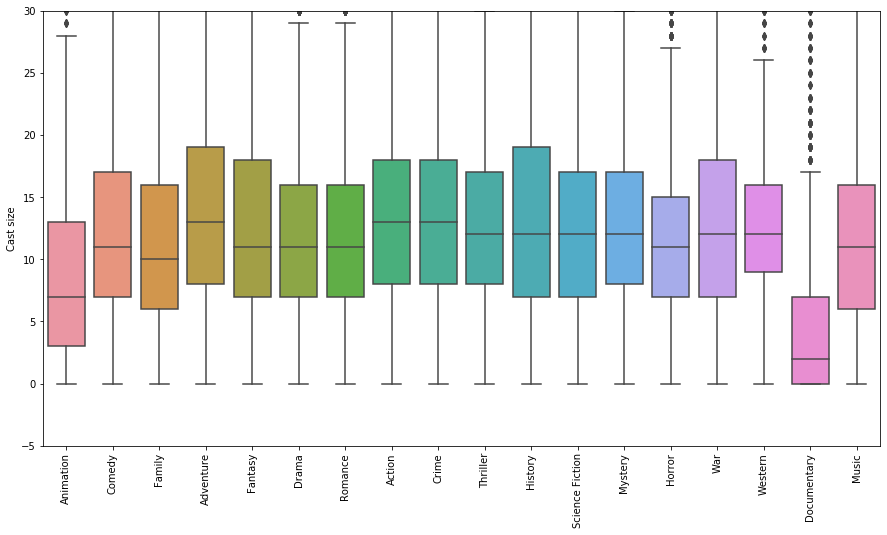

In [106]:
plt.figure(figsize=(15,8))
sns.boxplot(x='genres', y='cast_size', data=movies.explode('genres')[movies.explode('genres')['genres'].isin(genres)],
            order=genres)
plt.gca().set_ylim(-5,30)
plt.xticks(rotation=90)
plt.ylabel('Cast size')
plt.xlabel('');

The only genres with noticeably smaller cast sizes are documentaries and animation movies. Documentaries are focused more on delivering facts than stories, so do not require multiple characters to be cast. In the case of animations, the only cast needed are for the characters' voices, which can also be reused if an actor is capable of producing many different voices. 

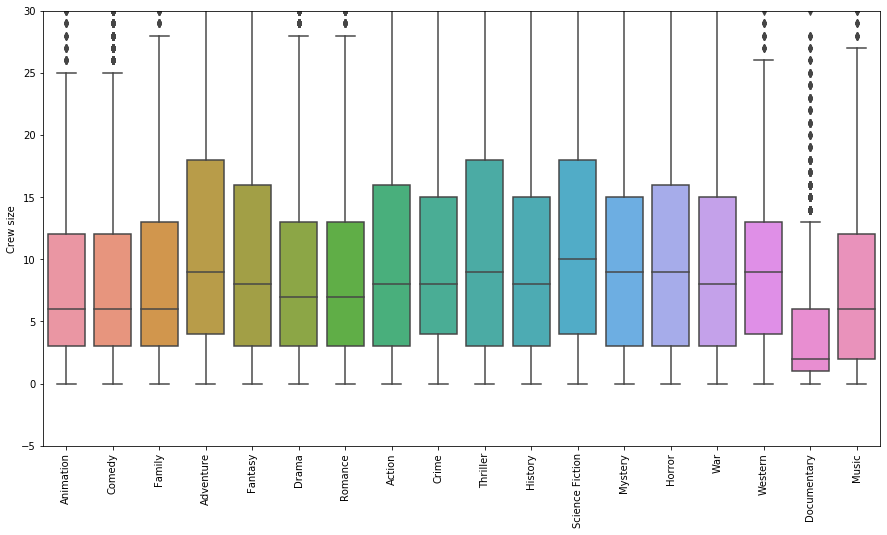

In [107]:
plt.figure(figsize=(15,8))
sns.boxplot(x='genres', y='crew_size', data=movies.explode('genres')[movies.explode('genres')['genres'].isin(genres)],
            order=genres)
plt.gca().set_ylim(-5,30)
plt.xticks(rotation=90)
plt.ylabel('Crew size')
plt.xlabel('');

As with cast size, the crew size is only noticeably different for documentaries, though there is some variance in the upper bounds compared to the lower bounds.